# Datenspuren 2015 Talk Beispiele für Maschinelles Lernen

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid')

## Prolog

Computer sind nicht sehr clever. Aber schnell. Dahinter steckt die Grundidee fast jeden Algorithmus'.

In [17]:
geheimzahl = 4521

In [31]:
for zahl in range(10000):
    if zahl==geheimzahl:
        print('Deine Geheimzahl war \'%i\'' % zahl)

Deine Geheimzahl war '4521'


OK, lass uns mal ein kleines Dataset generieren, mit dem wir etwas zeigen können.

In [19]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=42, cluster_std=3.2)
X+=11.0
X*=10.0

## Supervised Learning: Support Vector Machine

Ist die Person kreditwürdig oder nicht? Es gibt nur 2 Features:

* freies mtl. Einkommen
* angefragte mtl. Kreditrate

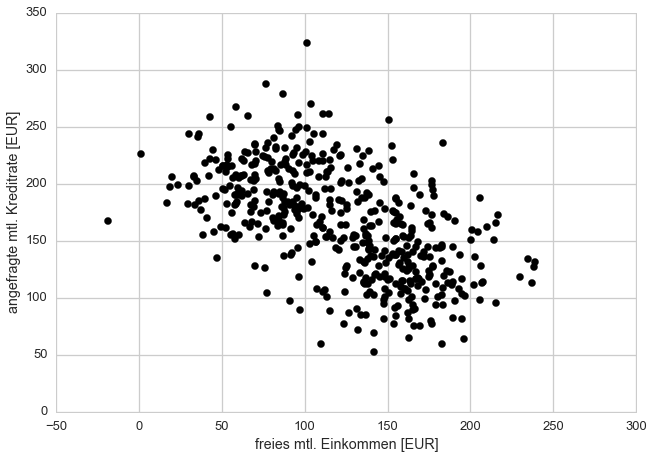

In [20]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='k')
plt.xlabel(u'freies mtl. Einkommen [EUR]')
plt.ylabel(u'angefragte mtl. Kreditrate [EUR]')

### Support Vector Machine

Code and Animation from [Jake VanderPlas](https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/03.1-Classification-SVMs.ipynb)

In [21]:
from sklearn.svm import SVC # "Support Vector Classifier"

In [22]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

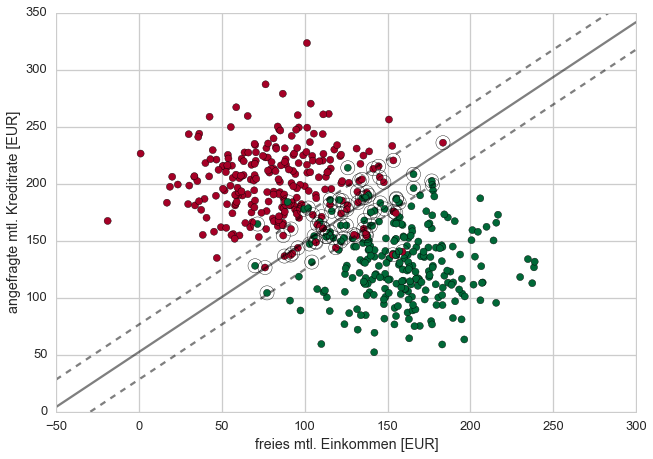

In [23]:
from IPython.html.widgets import interact

def plot_svm(N=500):
    X, y = make_blobs(n_samples=500, centers=2,
                  random_state=42, cluster_std=3.2)
    X+=11.0
    X*=10.0
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
    plt.xlim(-50, 300)
    plt.ylim(0, 350)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    plt.xlabel(u'freies mtl. Einkommen [EUR]')
    plt.ylabel(u'angefragte mtl. Kreditrate [EUR]')
    
interact(plot_svm, N=[5, 500], kernel='poly');

# Unsupervised Learning: Clustering

[KMeans](http://scikit-learn.org/stable/modules/clustering.html#k-means) findet Cluster selbst, man muss nur sagen, wieviel unterschiedliche man haben möchte.

In [24]:
from sklearn.cluster import KMeans

In [25]:
cluster = KMeans(n_clusters=2)

In [26]:
cluster.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [27]:
labels = cluster.predict(X)

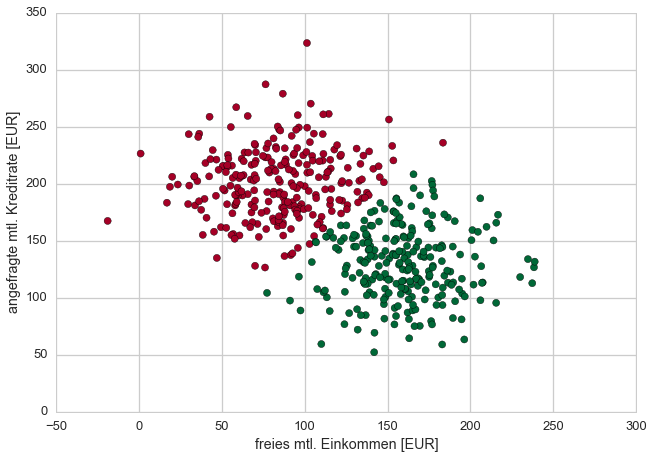

In [28]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels, cmap='RdYlGn')
plt.xlabel(u'freies mtl. Einkommen [EUR]')
plt.ylabel(u'angefragte mtl. Kreditrate [EUR]')

### How it Works

Code and Animation from [Jake VanderPlas](https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/fig_code/figures.py)

In [29]:
from KMeansInteractive import plot_kmeans_interactive

<function KMeansInteractive._kmeans_step>

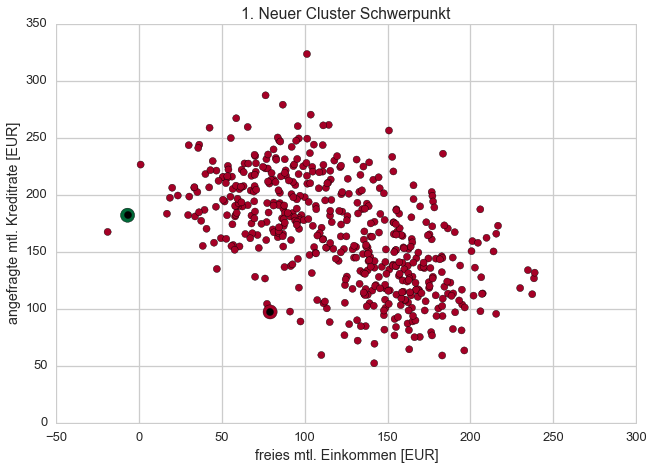

In [30]:
plot_kmeans_interactive(X, labels)